In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DataFrame = pd.read_csv(r'C:\Users\lucas\OneDrive\Documents\PowerBI\DataFrame\stolenvehicles.csv')

# Análise Preliminar

In [3]:
DataFrame.sample(5)

,Color,VehicleModel,VehicleDesc,ModelYear,VehicleType,DateStolen,Location
4325,Green,Nissan,DATSUN,1992,Utility,25/03/2022,Bay of Plenty
4391,Silver,Trailer,PRESCOTT,2001,Trailer,6/02/2022,Bay of Plenty
186,Blue,Homebuilt,TRAILER,1990,Trailer,19/03/2022,Wellington
648,White,Yamaha,XT,1993,Roadbike,13/02/2022,Northland
3447,Grey,Toyota,AQUA,2013,Hatchback,5/04/2022,Waitemata


In [4]:
DataFrame.isnull().sum()

Color           17
VehicleModel    15
VehicleDesc     35
ModelYear        0
VehicleType     26
DateStolen       0
Location         0
dtype: int64

In [5]:
DataFrame[DataFrame.isnull().T.any()]

,Color,VehicleModel,VehicleDesc,ModelYear,VehicleType,DateStolen,Location
120,Brown,Oxford,NaN,1971,Caravan,20/12/2021,Waitemata
179,NaN,NaN,NaN,0,NaN,14/03/2022,Counties/Manukau
239,Black,BMW,335i,2009,NaN,22/02/2022,Waitemata
302,NaN,NaN,NaN,0,NaN,9/10/2021,Eastern
303,Brown,Homebuilt,NaN,1972,Caravan,11/11/2021,Canterbury
380,Grey,Trailer,NaN,1984,Boat Trailer,28/01/2022,Waikato
437,Green,Trailer,NaN,1984,Trailer,29/03/2022,Tasman
449,Red,Honda,TRX520FW2M,0,NaN,7/10/2021,Northland
521,Grey,Trailer,NaN,1960,Trailer,5/03/2022,Eastern
528,NaN,NaN,NaN,0,NaN,23/11/2021,Auckland City


In [6]:
DataFrame.describe()

,ModelYear
count,4553.000000
mean,1996.420163
std,132.935607
min,0.000000
25%,2000.000000
50%,2005.000000
75%,2011.000000
max,2022.000000


# Data Cleaning

## Dados Nulos

In [7]:
DataFrame.isnull().sum()

Color           17
VehicleModel    15
VehicleDesc     35
ModelYear        0
VehicleType     26
DateStolen       0
Location         0
dtype: int64

In [8]:
DataFrame.dropna(axis=0, inplace = True)

## Dados Duplicados

In [9]:
DataFrame.duplicated().sum()

12

In [10]:
DataFrame[DataFrame.duplicated()]

,Color,VehicleModel,VehicleDesc,ModelYear,VehicleType,DateStolen,Location
568,Grey,Trailer,DOMESTIC,2020,Trailer,27/02/2022,Counties/Manukau
1277,Red,Triumph,SPEED TRIPLE,2011,Roadbike,5/03/2022,Canterbury
1358,Silver,Mazda,CAPELLA,1999,Stationwagon,29/01/2022,Wellington
1486,White,Mazda,CAPELLA,2002,Saloon,17/11/2021,Bay of Plenty
1674,Red,Ford,COURIER,2003,Utility,4/03/2022,Waikato
1838,Orange,Trailer,CAR TRANSPORTER,2005,Trailer - Heavy,11/01/2022,Eastern
1876,Blue,Mitsubishi,COLT,2006,Hatchback,23/11/2021,Auckland City
2736,Silver,Mazda,DEMIO,2005,Hatchback,28/02/2022,Auckland City
2882,Black,Subaru,FORESTER,2006,Stationwagon,8/01/2022,Waikato
3236,Silver,Mazda,ATENZA,2006,Stationwagon,17/10/2021,Bay of Plenty


In [11]:
DataFrame.drop_duplicates(keep=False,inplace=True)

In [12]:
DataFrame.duplicated().sum()

0

# Análises

## Localizações que mais possuem roubos

In [13]:
local_roubo = DataFrame.groupby('Location').count().ModelYear.sort_values(ascending=False)
local_roubo

Location
Canterbury          653
Auckland City       625
Counties/Manukau    586
Bay of Plenty       438
Wellington          415
Waitemata           401
Waikato             361
Central             350
Northland           233
Eastern             171
Southern            161
Tasman               91
Name: ModelYear, dtype: int64

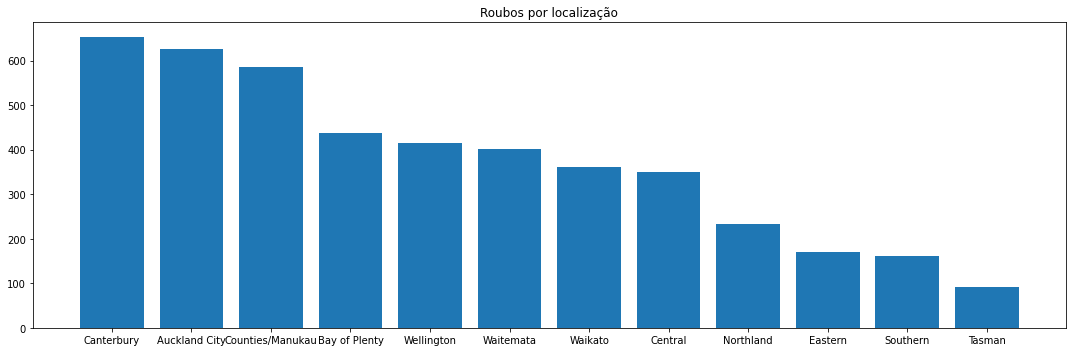

In [14]:
plt.figure(figsize=(15,5))
plt.bar(local_roubo.index, local_roubo.values)
plt.title('Roubos por localização')
plt.tight_layout()

## Meses em que há maior índice de roubos

In [15]:
DataFrame['DateStolen']

0        5/11/2021
1       13/12/2021
2       13/02/2022
3       13/11/2021
4       10/01/2022
           ...    
4545    22/03/2022
4546    15/02/2022
4547    29/10/2021
4548     9/12/2021
4549     3/04/2022
Name: DateStolen, Length: 4485, dtype: object

In [16]:
DataFrame['DateStolen'] = pd.to_datetime(DataFrame.DateStolen, format='%d/%m/%Y')

In [17]:
DataFrame['DateStolen'].dt.month

0       11
1       12
2        2
3       11
4        1
        ..
4545     3
4546     2
4547    10
4548    12
4549     4
Name: DateStolen, Length: 4485, dtype: int64

In [18]:
DataFrame['Mes'] = DataFrame['DateStolen'].dt.strftime('%Y/%m')
DataFrame

,Color,VehicleModel,VehicleDesc,ModelYear,VehicleType,DateStolen,Location,Mes
0,Silver,Trailer,BST2021D,2021,Trailer,2021-11-05,Waitemata,2021/11
1,Silver,Trailer,OUTBACK BOATS FT470,2021,Boat Trailer,2021-12-13,Eastern,2021/12
2,Silver,Trailer,ASD JETSKI,2021,Boat Trailer,2022-02-13,Auckland City,2022/02
3,Silver,Trailer,MSC 7X4,2021,Trailer,2021-11-13,Central,2021/11
4,Silver,Trailer,D-MAX 8X5,2018,Trailer,2022-01-10,Waitemata,2022/01
...,...,...,...,...,...,...,...,...
4545,Red,Nissan,MAXIMA,2001,Saloon,2022-03-22,Bay of Plenty,2022/03
4546,Green,Nissan,CEFIRO,1995,Saloon,2022-02-15,Bay of Plenty,2022/02
4547,Blue,Nissan,ATLAS,1993,Other Truck,2021-10-29,Canterbury,2021/10
4548,White,Mitsubishi,L300,2001,Light Van,2021-12-09,Northland,2021/12


In [19]:
roubos_mes = DataFrame.groupby('Mes').count()

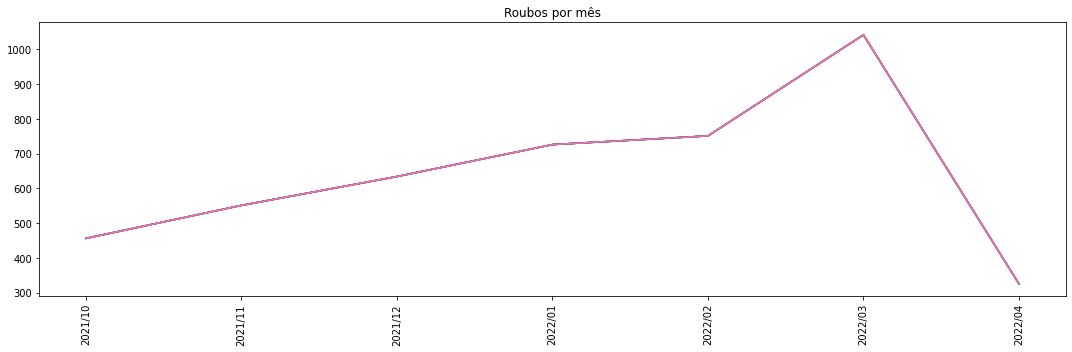

In [20]:
plt.figure(figsize=(15,5))
plt.plot(roubos_mes.index, roubos_mes.values)
plt.xticks(rotation=90)
plt.title('Roubos por mês')
plt.tight_layout()

## Tipos de veículos mais roubados

In [21]:
tipo_veiculo = DataFrame.groupby('VehicleType').count().ModelYear.sort_values(ascending=False)
tipo_veiculo

VehicleType
Stationwagon               938
Saloon                     846
Hatchback                  638
Trailer                    570
Utility                    464
Roadbike                   295
Moped                      187
Light Van                  154
Boat Trailer               104
Trailer - Heavy             87
Other Truck                 42
Sports Car                  40
Caravan                     40
Flat Deck Truck             17
Mobile Home - Light         15
Convertible                 12
Cab and Chassis Only         8
Heavy Van                    7
Light Bus                    6
All Terrain Vehicle          5
Tractor                      4
Trail Bike                   2
Mobile Machine               2
Special Purpose Vehicle      1
Articulated Truck            1
Name: ModelYear, dtype: int64

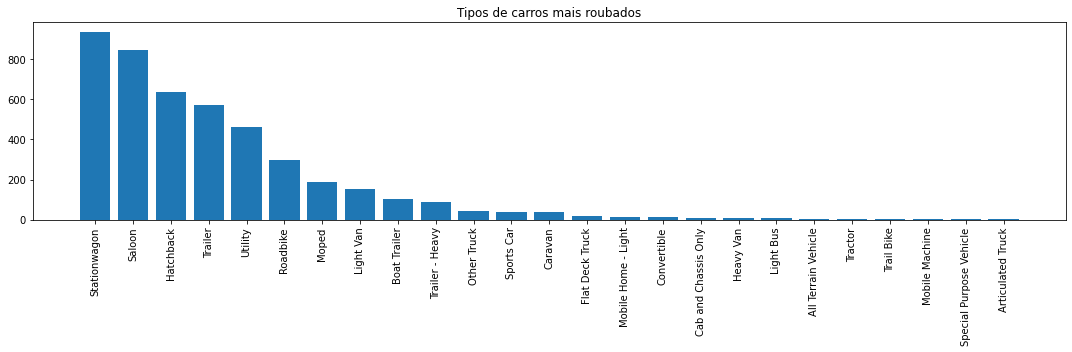

In [22]:
plt.figure(figsize=(15,5))
plt.bar(tipo_veiculo.index, tipo_veiculo.values)
plt.xticks(rotation=90)
plt.title('Tipos de carros mais roubados')
plt.tight_layout()

In [40]:
ano_carro = DataFrame.ModelYear.value_counts().head(10).sort_values(ascending=False)
ano_carro

2005    342
2006    327
2007    248
2004    238
2008    188
2002    179
2003    171
1998    159
1996    156
2001    152
Name: ModelYear, dtype: int64

Text(0.5, 1.0, 'Ano de fabricação dos carros mais roubados')

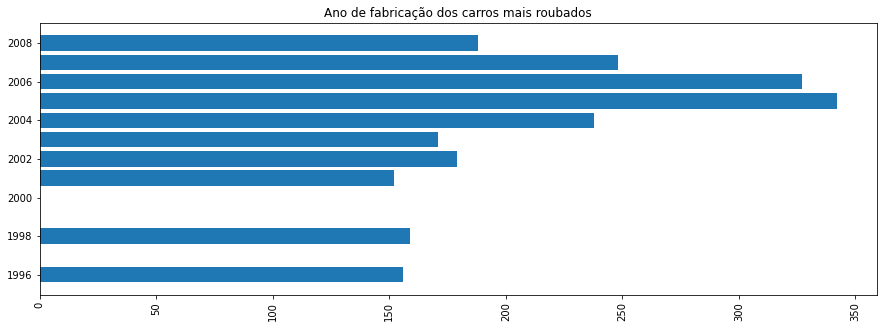

In [43]:
plt.figure(figsize=(15,5))
plt.barh(ano_carro.index, ano_carro.values)
plt.xticks(rotation=90)
plt.title('Ano de fabricação dos carros mais roubados')